In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pomegranate.bayesian_network import _learn_structure, BayesianNetwork
import networkx as nx
from tqdm import tqdm
import pandas as pd
from scipy.stats import entropy
from collections import defaultdict, deque
import warnings
warnings.filterwarnings("ignore")

from bayes_utils import convert_to_dict, convert_to_tuple, visualize_BN, topological_sort, simulate_data, get_distribution, avg_kl, simulation_auto

In [11]:
# 0:E, 1:B, 2:A, 3: R, 4:C

# E -> Earthquake
# B -> Burglary
# A -> Alarm
# R -> Radio
# C -> Cat

In [4]:
dep = {0:(), 1:(), 2:(0,1), 3:(0,), 4:(2,)}
dep_names = {'E':(), 'B':(), 'A':('E','B'), 'R':('E',), 'C':('A',)}

In [5]:
variables = ['E', 'B', 'A', 'R', 'C']
dep = {0:(), 1:(), 2:(0,1), 3:(0,), 4:(2,)}
probs = {'E': [0.01, 0.99], 'B': [0.8, 0.2], 'A': [[0.86, 0.14], [0.03, 0.97], [0.1, 0.9], [0.01, 0.99]], 'R': [[0.95, 0.05], [0.4, 0.6]], 'C': [[0.99, 0.01], [0.3, 0.7]]}
data_sizes = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
n = 100

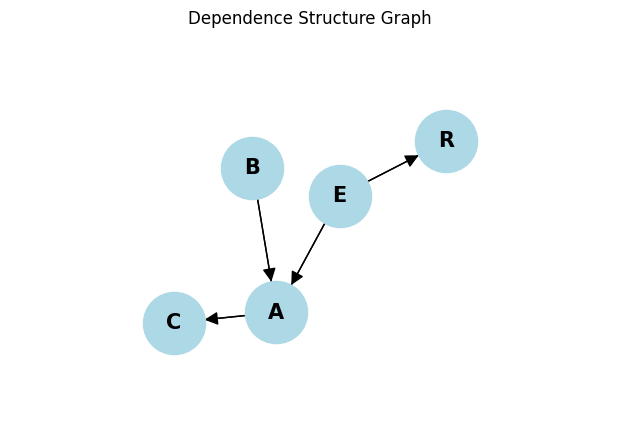

In [9]:
visualize_BN(dependency_dict = dep_names, fig_name = 'alarm.pdf')

In [6]:
kl_divs = simulation_auto(variables = variables, dependency = dep, probs = probs, n = n, data_sizes = data_sizes, output = 'kl')
accs = simulation_auto(variables = variables, dependency = dep, probs = probs, n = n, data_sizes = data_sizes, output = 'accuracy')

100%|██████████| 11/11 [00:08<00:00,  1.33it/s]


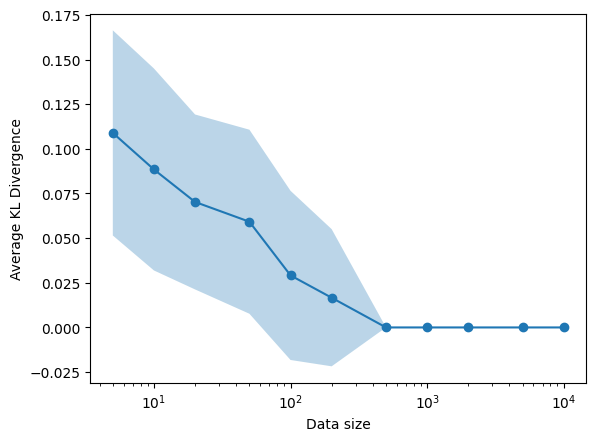

In [7]:
plt.plot(data_sizes, kl_divs.mean(axis=1), marker='o')
plt.fill_between(data_sizes, kl_divs.mean(axis=1) - kl_divs.std(axis=1), kl_divs.mean(axis=1) + kl_divs.std(axis=1), alpha=0.3)
plt.xlabel('Data size')
plt.ylabel('Average KL Divergence')
plt.xscale('log')

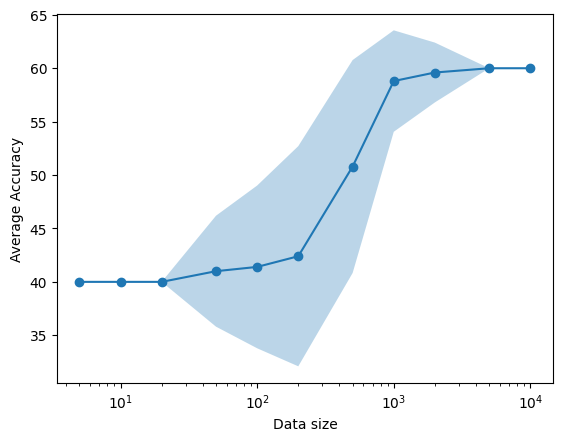

In [8]:
plt.plot(data_sizes, accs.mean(axis=1), marker='o')
plt.fill_between(data_sizes, accs.mean(axis=1) - accs.std(axis=1), accs.mean(axis=1) + accs.std(axis=1), alpha=0.3)
plt.xlabel('Data size')
plt.ylabel('Average Accuracy')
plt.xscale('log')